<a href="https://colab.research.google.com/github/arehfeldt/machine-learning-dump/blob/main/Aaron_Rehfeldt_CSE5522_Perceptron_Learning_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Learning

**Overview**

The perceptron learning rule is a simple method for training a linear classifier.

The basic idea is: when you classify something incorrectly, move the linear classifier a bit in a way that updates the boundary line.  This is related to the gradient descent algorithm used for linear regression.

In the first part of the exercise, you will learn the "and" function to show the basic operation of the PLR, and in the second you'll try to classify some vowels.

There is an optional part to play around with PyTorch, a toolkit that can be used to quickly learn neural networks.  I'll provide a quick walkthrough for learning the XOR problem (based on some code from U. Washington); see if you can adapt this to the vowel classification problem.

**Part 1**

In the first part of the hands-on, you'll code the Perceptron Learning Rule (PLR) algorithm.

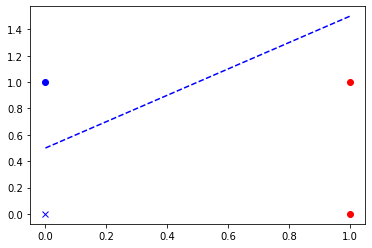

In [ ]:
# set up some preliminaries

import numpy as np
import matplotlib.pyplot as plt

# set classification data for "and"
data=np.array([[0,0],[0,1],[1,0],[1,1]])
targets=np.array([0,1,1,1])
bias=-1

# set some initial weights : w1, w2, bias
weights_init=np.array([-1,1,0.5])

# here is a function for plotting both the dataset and the current decision
# boundary, with errors in red
def plotgraph(data,targets,weights):
  classification=(np.sign(np.dot(np.hstack((data,np.ones((data.shape[0],1))*bias)),weights))+1)/2

  plt.plot(data[np.logical_and(targets==1,classification==1),0],
           data[np.logical_and(targets==1,classification==1),1],'bo')
  plt.plot(data[np.logical_and(targets==1,classification==0),0],
           data[np.logical_and(targets==1,classification==0),1],'ro')
  plt.plot(data[np.logical_and(targets==0,classification==1),0],
           data[np.logical_and(targets==0,classification==1),1],'rx')
  plt.plot(data[np.logical_and(targets==0,classification==0),0],
           data[np.logical_and(targets==0,classification==0),1],'bx')

  # note weights are in form w_1*x + w_2*y + w_b = 0
  # so to plot line we need y= -(w_1*x + w_b)/(w_2)
  dmin=np.min(data[:,0])
  dmax=np.max(data[:,0])
  plt.plot(np.array([dmin,dmax]),
           np.array([-(dmin*weights[0]+weights[2]*bias)/(weights[1]),
                     -(dmax*weights[0]+weights[2]*bias)/(weights[1])]),
           'b--'
           )


#Plot the current situation.  Red items are misclassified, blue
#correctly classified. x=0, circle=1.
plotgraph(data,targets,weights_init)



**1.1** This is where you will need to code the perceptron learning algorithm.

You should assume that the nonlinear function is a step function that outputs 1 if the input is greater than 0, and 0 otherwise.

Remember that there should be a bias.  You can choose to define the fixed bias as -1 (as traditionally done) or 1.  Note if you change the bias you may need to pay attention to the plotting function above.

The function should return the updated weight vector.  

In [ ]:
def step(x):
  return (np.sign(x)+1)/2

def plr(weights,example,target,learningrate):
  example=np.hstack((example,bias)) #Add bias as extra "input"
  o=step(np.dot(example,weights))
  # compute weight update
  e=target-o
  new_weights=weights+learningrate*e*example
  # return updated weights
  return new_weights


**1.2** The following function will randomize your training examples, and run the PLR for each example.

In [ ]:
def run_epoch(weights,data,targets,learningrate):
  nexamples=data.shape[0]
  order=np.random.permutation(nexamples)
  for i in range(nexamples):
    weights=plr(weights,data[order[i]],targets[order[i]],learningrate)
  return weights

**1.3** Now write a bit of code to run through epochs until convergence.

In [ ]:
# write code to run through convergence
# put final weights into "finalweights"
learning_rate=0.01

weights=weights_init
old_weights=np.zeros(weights.shape)
epoch=0
while np.any(weights!=old_weights): #Since problem is linearly separable, error should go to zero thus weights won't change
  epoch+=1
  old_weights=weights

  weights=run_epoch(weights,data,targets,learning_rate)

  if epoch%10==9:
    display(epoch+1, weights)

  if epoch>1000: break # avoid infinite loop, just in case

finalweights=weights


10

array([-0.82,  1.09,  0.32])

20

array([-0.71,  1.1 ,  0.21])

30

array([-0.61,  1.1 ,  0.11])

40

array([-0.51,  1.1 ,  0.01])

50

array([-4.10000000e-01,  1.10000000e+00, -3.08780779e-16])

60

array([-3.10000000e-01,  1.10000000e+00, -3.08780779e-16])

70

array([-2.10000000e-01,  1.10000000e+00, -3.08780779e-16])

80

array([-1.10000000e-01,  1.10000000e+00, -3.08780779e-16])

90

array([-1.00000000e-02,  1.10000000e+00, -3.08780779e-16])

**1.4** Plot the final weights to show the boundary that you have learned.

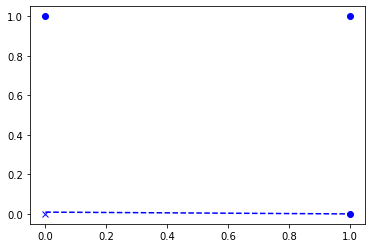

In [ ]:
plotgraph(data,targets,finalweights)

**1.5** Optional extensions:

**1.5.1** Rerun your code for the "or" function.

**1.5.2** Modify your code to allow for the majority class function for three inputs (i.e. 1 if 2 or more inputs are on).

**1.5.3** Investigate what happens if you run the "xor" function through the training.


**Part 2: Vowel Classification**

In this section, you will look at some actual (noisy) vowel formant data.

Formants, as we use them here, are the local maxima, or broad peaks, in a sound's spectrogram. They are related to the harmonic structure of sounds and so we expect them to be highly related to speech. So we will attempt to use formant pairs (the two highest/most powerful, peaks) to predict vowels.

Go to the International Phonetic Alphabet (IPA) vowel chart at https://en.wikipedia.org/wiki/IPA_vowel_chart_with_audio and play the sounds.  The chart is written in IPA, but here are the two letter (ARPABET) symbols for some of the vowels of English: iy, ih, ey, eh, ah, ao, ow, uw, ax.

Vowels are produced by shaping the vocal tract so some of their features are:

|Vowel|Tongue Height|Tongue Depth|Lip Shape|
|---|---|---|---|
|iy|close|front|unrounded|
|ih|near-close|front|unrounded|
|ey|close-mid|front|unrounded|
|eh|open-mid|front|unrounded|
|ah|open|back|rounded|
|ao|open-mid|back|rounded|
|ow|close-mid|back|rounded|
|uw|close|back|rounded|
|ax|mid|central|unrounded|

I've prepared a csv datafile with the following features:
* Vowels
 * 'vowel': Two-letter vowel identifier (e.g., 'iy', 'ih', etc.)
* Formants
 * 'f1': Strongest formant (in Hz)
 * 'f2': Second strongest formant (in Hz)
* Tongue Height
 * 'h1': close
 * 'h2': near-close or lower
 * 'h3': close-mid or lower
 * 'h4': mid or lower
 * 'h5': open-mid or lower
 * All are boolean (0,1)
 * **Note:** The above are inclusive of more closed states. For example, 'ey' being 'close-mid' would have h3,h4,h5 true and h1,h2 false. This means you would need to combine (logical and,negation) multiple of the above features to determine a specific Tongue Height condition.
* Tongue Depth
 * 'b1': back
 * 'b2': central or back
 * Also boolean
 * **Note:** You can see 'front' is missing and 'central' in combined with 'back'. Similar to above, you would need to combine the above features together to get specific Tongue Depth values. (For example, for 'central' you would need to have b2 be true but b1 be false.)
* Lip Shape
 * r: rounded
 * Again boolean, negate for 'unrounded'

---

First, let's read in the data.


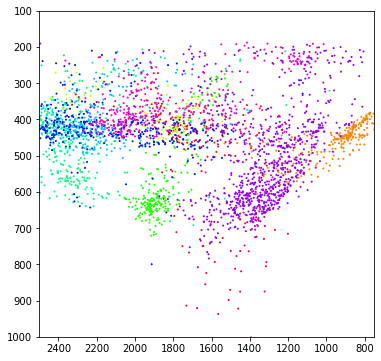

In [ ]:
# first, read in the data and build a scatterplot showing the vowel formants
import pandas as pd
url='https://raw.githubusercontent.com/efosler/cse5522data/master/vowelfmts.csv'
df=pd.read_csv(url)

# This function will plot the vowels as a scatterplot with different colors
# using the traditional F2 vs F1 inverted plot.  This puts high (close) vowels
# at the top of the plot and low vowels (open) at the bottom.  Front vowels
# are to the left; back vowels to the right.  Optionally can plot a boundary.

def plotvowels(df,weights=None):
  # this next bit converts the label into a colormap value between 0 and 1
  vowels=df['vowel'].unique()
  vmap={}
  for i in range(vowels.shape[0]):
    vmap[vowels[i]]=float(i)/float(vowels.shape[0]-1)
  df['color']=df['vowel'].map(vmap)
  # plot the scatterplot
  plt.figure(num=1,figsize=(6,6))
  plt.scatter(df['f2'],df['f1'],s=1,c=df['color'],cmap='gist_rainbow')
  plt.gca().set_ylim([100,1000])
  plt.gca().set_xlim([750,2500])
  plt.gca().invert_xaxis()
  plt.gca().invert_yaxis()
  if weights is not None:
    dmin=df['f2'].min()
    dmax=df['f2'].max()
    plt.plot(np.array([dmin,dmax]),
             np.array([-(dmin*weights[0]+weights[2])/(weights[1]),
                       -(dmax*weights[0]+weights[2])/(weights[1])]),
             'b--'
             )

# Plot the vowel data.  Compare against the IPA chart online.
plotvowels(df)

You will notice that the vowel classes aren't linearly separable.

In Lab 4, you will try to separate vowels by different types of vocal tract features (back / front / close / open), and use perceptrons to predict those features (h1-h5, b1, b2, r).

**Part 3: PyTorch Neural Networks**

This is a quick runthrough of PyTorch, and how to build a neural network.  The code below is a modified version of https://courses.cs.washington.edu/courses/cse446/18wi/sections/section8/XOR-Pytorch.html with some additional annotations to help you along.

This part is mostly read-and-run, but at the end you can test your understanding by modifying the code.

**3.1** First some library preliminaries.

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

#Use GPU if available
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
#Make note of everywhere you see ".to(dev)". We are trying to transfer the PyTorch object (tensor,model,etc)
#  to the gpu (if available) so computation can be done there.
#NOTE: For this to have any effect, you will need to go to "Runtime" -> "Change runtime type" -> "Hardware accelerator" -> "GPU"
#        Don't bother for the hands on, but highly recommended for the lab

**3.2** Now set up the data into *tensors* (i.e. multidimensional arrays).  X is the data array, Y is the target.

In [ ]:
X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]]).to(dev)
Y = torch.Tensor([0,1,1,0]).view(-1,1).to(dev)

**3.3** Let's define a multi-layer perceptron with 2 layers.  Each layer will create a linear combination of the inputs, and feed to a sigmoid output.

Note that the initializer (with the calls to nn.Linear) will create a set of parameters that are associated with the model.

In [ ]:
class MLP2(nn.Module):
    def __init__(self, input_dim = 2, hid_dim=2, output_dim=1):
        # initialze the superclass
        super(MLP2, self).__init__()
        # this will create a linear layer with input_dim x hid_dim parameters
        # in addition to a bias unit with hid_dim parameters
        self.lin1 = nn.Linear(input_dim, hid_dim)
        # same thing here except hid_dim x output_dim
        self.lin2 = nn.Linear(hid_dim, output_dim)

    # this is where the meat of the action is
    def forward(self, x):
        x = self.lin1(x)  # linear combination of inputs
        x = torch.sigmoid(x) # then through sigmoid - output of first layer
        x = self.lin2(x) # linear combination of hidden units
        x = torch.sigmoid(x) # then through sigmoid - net output
        return x

**3.4** We also define a function to initialize weights of our model.

In [ ]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)


**3.5** Now create a model and initialize it.  Also define a loss function and the optimizer.

In [ ]:
model = MLP2().to(dev)
weights_init(model)
loss_func = nn.MSELoss().to(dev)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)


**3.6** Now we run the training.

In [ ]:
#Stochastic Gradient Descent
#-------------------------------
#By randomly varying the order we train data points, we introduce some beneficial
#noise which will help avoid getting stuck in shallow local minima (among other things)
epochs = 3001
N = X.size(0)
for i in range(epochs):
  order=np.random.permutation(N) #Generate a random ordering (this ensures every datapoint is used for training, just in random order)
  for j in range(N):
    data_point = order[j]
    x_var = Variable(X[data_point], requires_grad=False)
    y_var = Variable(Y[data_point], requires_grad=False)
    optimizer.zero_grad() #Zero the gradient accumulators (individual gradient values can come from many sources, remember our discussion on re-using weights, we sum them all)
    y_hat = model(x_var) #Calculate the output of the model
    loss = loss_func.forward(y_hat, y_var) #Calculate loss between model output and target values
    loss.backward() #Back propogation - calcluate gradients by propogating loss backwards through the network
    optimizer.step() #Use the gradients to update weights, take a "step" in the loss-minimizing direction

  if i % 500 == 0:
    print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))


Epoch: 0, Loss: 0.0002561479341238737, 
Epoch: 500, Loss: 0.25510621070861816, 
Epoch: 1000, Loss: 0.2541165351867676, 
Epoch: 1500, Loss: 0.24871206283569336, 
Epoch: 2000, Loss: 0.00020956152002327144, 
Epoch: 2500, Loss: 0.0002141648146789521, 
Epoch: 3000, Loss: 0.2546665668487549, 


**3.7** This is a neat little bit of code that will print out the first layer's decision boundaries.

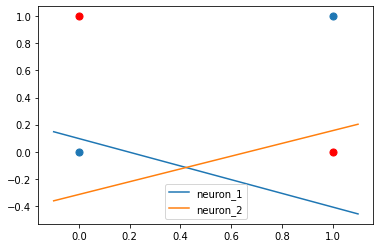

In [ ]:
model_params = list(model.parameters())
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()

**3.8** Now take a look at the parameters that were learned.  Can you trace how the xor decision works for each of the datapoints?  

The first tensor is the input-hidden weights, second is the bias-hidden weights, third is hidden-output, and last is bias-output.

In [ ]:
model_params

[Parameter containing:
 tensor([[-3.7523, -6.8069],
         [-3.7723,  7.1633]], requires_grad=True), Parameter containing:
 tensor([0.6694, 2.5623], requires_grad=True), Parameter containing:
 tensor([[-5.1658, -4.1762]], requires_grad=True), Parameter containing:
 tensor([4.1477], requires_grad=True)]

**3.9** Can you figure out what in the above code would need to be modified to add a third layer?  Or change the activation function?

**3.10** In 3.6 above, we used stochastic gradient descent in online mode.

As we discussed in class, online mode can be very inefficient, especially if taking advantage of GPUs to accelerate training. For the above example problem (XOR) this is immaterial since we only have 4 data points, but consider a more realistic problem (e.g., the upcoming lab).

Think about how you would modify the code in 3.6 to do mini-batch training instead. (Remember, this was where every epoch we divided the training set into randomized pieces, mini-batches, and present each one in turn for training.)

*Hint*: You might first try converting the 3.6 code to simple batch training, i.e. train on the entire data set at once. It should be easier to see from that how to present randomized mini-batches for training.

In [ ]:
# Batch Training
# -------------------------------
# Unfortunately, because of the way libraries like PyTorch work, it can be very inefficient
# to only give them one data point at a time.
# In the past, batch training, where we give the entire dataset to train on, was used
# to avoid such inefficiencies. (But, of course, we lose the effect of beneficial noise.)
epochs = 3001
N = X.size(0)
for i in range(epochs):
  x_var = Variable(X, requires_grad=False)
  y_var = Variable(Y, requires_grad=False)

  optimizer.zero_grad()
  y_hat = model(x_var)
  loss = loss_func.forward(y_hat, y_var)
  loss.backward()
  optimizer.step()

  if i % 500 == 0:
    print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.cpu().numpy()))


Epoch: 0, Loss: 0.12561602890491486, 
Epoch: 500, Loss: 0.12560640275478363, 
Epoch: 1000, Loss: 0.12559713423252106, 
Epoch: 1500, Loss: 0.12558798491954803, 
Epoch: 2000, Loss: 0.12557923793792725, 
Epoch: 2500, Loss: 0.12557066977024078, 
Epoch: 3000, Loss: 0.12556245923042297, 


In [ ]:
#SGD w/ mini-batches
#-------------------------------
#But as you can see, if you give batch training a try, it takes longer to converge and
#isn't as reliable. Turns out noise realy is beneficial.
#The modern approach is to split the difference between the two. Use more than one data
#point at a time for training, but only a small random selection from the dataset: a mini-batch
epochs = 3001
N = X.size(0)
for i in range(epochs):
  mini_batch_size=2 #More common values for this are ~50, but we only have 4 data points in this data set
  order=np.random.permutation(N)
  for j in range(0,N,mini_batch_size):
    data_points = order[j:min(j+mini_batch_size,N)]
    x_var = Variable(X[data_points], requires_grad=False)
    y_var = Variable(Y[data_points], requires_grad=False)

    optimizer.zero_grad()
    y_hat = model(x_var)
    loss = loss_func.forward(y_hat, y_var)
    loss.backward()
    optimizer.step()

  if i % 500 == 0:
    print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.cpu().numpy()))

Epoch: 0, Loss: 0.25040653347969055, 
Epoch: 500, Loss: 0.12515413761138916, 
Epoch: 1000, Loss: 0.12615065276622772, 
Epoch: 1500, Loss: 0.12590016424655914, 
Epoch: 2000, Loss: 0.2503829300403595, 
Epoch: 2500, Loss: 0.25037601590156555, 
Epoch: 3000, Loss: 0.12602394819259644, 
